# Regression

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [2]:
data = pd.read_csv('data/checker_regression.csv')

In [3]:
data.fillna(0, inplace=True)
data

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,0.00
1,user_1,62,28.0,0.00
2,user_1,62,28.0,0.00
3,user_1,62,28.0,0.00
4,user_1,62,28.0,0.00
...,...,...,...,...
72,user_31,128,0.0,-104.75
73,user_4,40,0.0,-175.60
74,user_6,15,0.0,-62.60
75,user_7,8,0.0,-115.50


In [4]:
X = data[['num_commits', 'pageviews']]
y = data['AVG(diff)']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [6]:
def crossval(n_splits, X, y, model):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    train_rmse = []
    test_rmse = []

    for train_index, test_index in kf.split(X):
        X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
        y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train_kf, y_train_kf)
        y_train_pred = model.predict(X_train_kf)
        y_test_pred = model.predict(X_test_kf)

        train_rmse.append(np.sqrt(mean_squared_error(y_train_kf, y_train_pred)))
        test_rmse.append(np.sqrt(mean_squared_error(y_test_kf, y_test_pred)))

    for i, (tr, ts) in enumerate(zip(train_rmse, test_rmse)):
        print(f'train - {tr} | test - {ts}')

    print(f'Средний RMSE на кросс-валидации: {np.mean(test_rmse)}')

In [7]:
print('Linear Regression:')
crossval(10, X, y, LinearRegression())

Linear Regression:
train - 42.27291015233797 | test - 70.43979397280242
train - 47.45726648237968 | test - 30.65739401435404
train - 47.77854388604299 | test - 27.137319378269105
train - 46.2441901620785 | test - 44.123072052096376
train - 46.39355004742244 | test - 42.420391728163665
train - 47.71541914802497 | test - 28.273391654514054
train - 46.308918660456506 | test - 45.67313727400561
train - 47.81194647242181 | test - 20.57247658092342
train - 44.12915324532897 | test - 63.14957718941947
train - 42.350893141368886 | test - 74.15893330081012
Средний RMSE на кросс-валидации: 44.66054871453583


In [8]:
print('Decision Tree Regressor:')
crossval(10, X, y, DecisionTreeRegressor(random_state=21))

Decision Tree Regressor:
train - 0.0 | test - 71.88489835223467
train - 0.0 | test - 25.24371208835975
train - 0.0 | test - 0.0
train - 0.0 | test - 20.293964620053917
train - 0.0 | test - 72.20506003352149
train - 0.0 | test - 28.991378028648448
train - 0.0 | test - 7.0364255643204405
train - 0.0 | test - 8.126236169698386
train - 0.0 | test - 86.63649383194165
train - 0.0 | test - 65.93049851867218
Средний RMSE на кросс-валидации: 38.634866720745094


In [9]:
print('Random Forest Regressor:')
crossval(10, X, y, RandomForestRegressor(random_state=21, n_estimators=100))

Random Forest Regressor:
train - 12.777661106062592 | test - 55.21884918830304
train - 14.944676960459738 | test - 14.136950174002187
train - 15.145373082774338 | test - 0.0
train - 14.781775951331486 | test - 26.925919120802543
train - 12.998387321887547 | test - 52.704000228872594
train - 15.162144682092565 | test - 32.380540830875574
train - 16.39491297753858 | test - 14.53373200141274
train - 14.98799883276986 | test - 22.20654668271111
train - 14.09532647051205 | test - 69.45674467575043
train - 15.002690750328759 | test - 42.562647313312866
Средний RMSE на кросс-валидации: 33.01259302160431


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [10]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=21),
    'Random Forest Regressor': RandomForestRegressor(random_state=21, n_estimators=100)
}

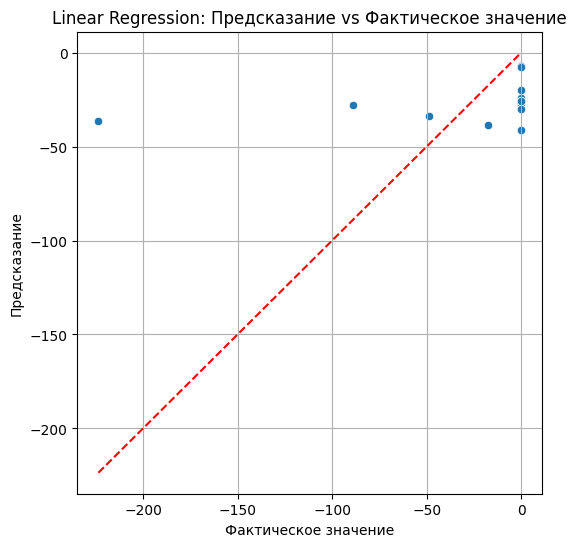

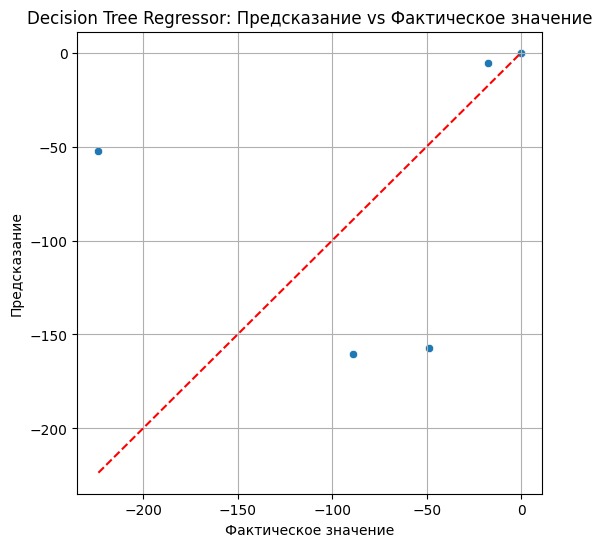

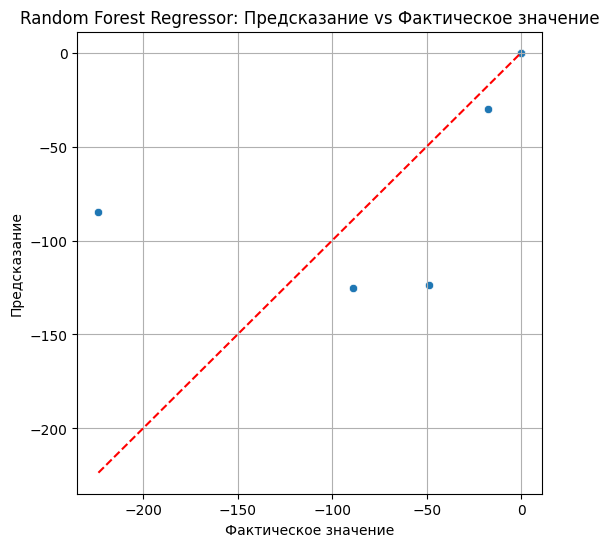

In [11]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.title(f'{name}: Предсказание vs Фактическое значение')
    plt.xlabel('Фактическое значение')
    plt.ylabel('Предсказание')
    plt.grid()
    plt.show()

ideal case: y_test=y_pred